In [15]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [19]:
trial = "numServer_linear_1_5_suite_1"
df, spec = dataset.load(bucket="perfd", 
                  app_name="memcached",
                  trial=trial)
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    display(df.sort_values("numServerInstance"))

,level_0,index,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,keySize,valueSize,serverThread,clientThread,runTime,waitTime,warmupTime,debug,avg_lat_read,std_lat_read,min_lat_read,99th_lat_read,rx_goodput,tx_goodput,tenancy
0,0,0,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,82.6,46.0,60.2,96.7,2.8,0.4,dedicated
19,19,19,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,80.9,33.6,60.2,95.8,2.9,0.4,dedicated
18,18,18,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,79.4,28.3,54.8,94.8,3.0,0.4,dedicated
17,17,17,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,81.9,32.3,54.8,96.6,2.9,0.4,dedicated
16,16,16,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,79.8,37.1,54.8,95.5,2.9,0.4,dedicated
15,15,15,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,80.2,39.0,54.8,95.4,2.9,0.4,dedicated
13,13,13,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,80.5,42.9,54.8,96.2,2.9,0.4,dedicated
12,12,12,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,79.3,30.7,60.2,95.0,3.0,0.4,dedicated
11,11,11,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,82.4,34.8,60.2,96.7,2.9,0.4,dedicated
10,10,10,1,1,c5.xlarge,c5.xlarge,30,200,4,1,10,2,2,False,79.9,32.4,54.8,95.3,2.9,0.4,dedicated


adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
|   False   |  lr | knn |  rf | svm | svm_k |  nn | best | oracle | naive |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
| memcached | 4.2 | 4.4 | 3.7 | 3.5 |  3.5  | 3.6 | 3.5  |  3.5   |  6.4  |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-----+-----+-----+-----+-----+
| App/RMSRE(%) | 1.0 | 2.0 | 3.0 | 4.0 | 5.0 |
+--------------+-----+-----+-----+-----+-----+
|  memcached   | 1.6 | 1.9 | 2.8 | 4.0 | 6.1 |
+--------------+-----+-----+-----+-----+-----+


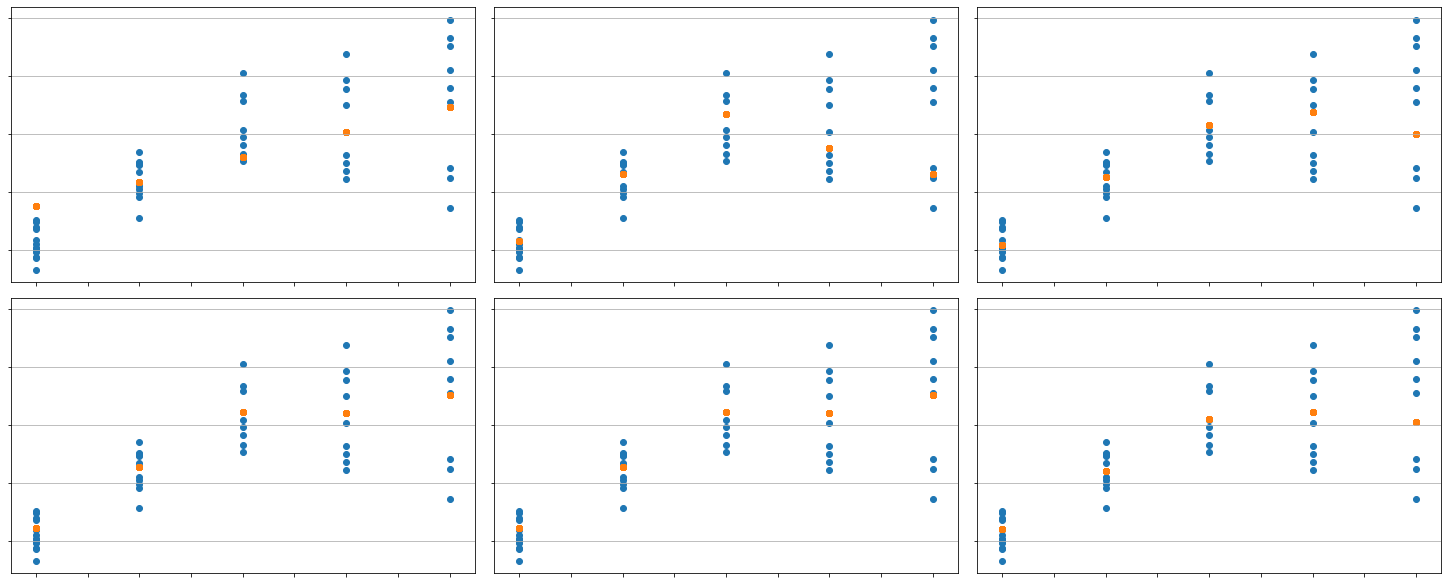

In [21]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["numServerInstance"]
ctx["target_feature"] = "avg_lat_read"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"memcached": df})

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
|   False   |  lr | knn |  rf | svm | svm_k |  nn | best | oracle | naive |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
| memcached | 3.6 | 3.6 | 3.6 | 6.6 |  6.6  | 4.5 | 3.6  |  3.4   |  82.5 |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-----+-----+-----+-----+-----+
| App/RMSRE(%) | 1.0 | 2.0 | 3.0 | 4.0 | 5.0 |
+--------------+-----+-----+-----+-----+-----+
|  memcached   | 1.8 | 1.9 | 2.7 | 4.0 | 5.8 |
+--------------+-----+-----+-----+-----+-----+


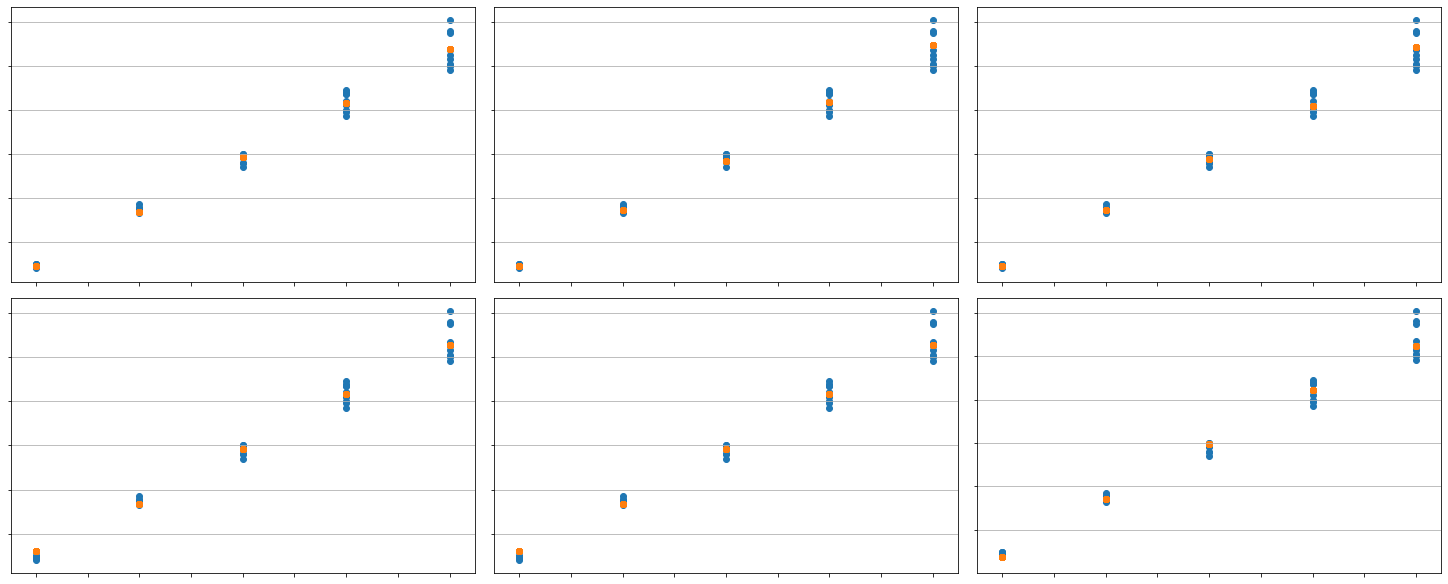

In [20]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["numServerInstance"]
ctx["target_feature"] = "rx_goodput"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
# TODO: no tune
results = dataset_tool.best_case_eval(ctx, {"memcached": df})